In [ ]:
import pandas as pd


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Shopping_CustomerData.csv')

In [ ]:
df.shape

(200, 8)

In [ ]:
df.info()

In [ ]:
import matplotlib.pyplot as plt
df.boxplot(figsize=(10,15))

In [ ]:
df.dtypes

CustomerID          int64
CustomerGender     object
CustomerAge         int64
CustomerCity       object
AnnualIncome      float64
CreditScore         int64
SpendingScore       int64
CustomerCityID      int64
dtype: object

In [ ]:
df['CustomerAge'].value_counts()

In [ ]:
df['CustomerGender'].value_counts()

Female    112
Male       88
Name: CustomerGender, dtype: int64

In [ ]:
df_new= df.loc[:,['CustomerAge','SpendingScore', 'CreditScore']]
df_new.head()

,CustomerAge,SpendingScore,CreditScore
0,49,78,653
1,59,63,630
2,54,69,555
3,42,30,699
4,30,6,793


In [ ]:
X=df_new
X

,CustomerAge,SpendingScore,CreditScore
0,49,78,653
1,59,63,630
2,54,69,555
3,42,30,699
4,30,6,793
...,...,...,...
195,54,52,601
196,20,58,554
197,44,36,844
198,28,24,837


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
#Call the model
k_means = KMeans(n_clusters = 5)

#fit the model
k_means.fit (X)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#Prediction
pred = k_means.predict(X)
print(pred)

[1 1 3 2 4 1 0 0 2 1 1 1 2 1 4 0 2 4 4 4 1 2 1 3 4 1 4 3 2 2 3 4 4 4 4 4 3
 0 2 1 4 2 2 2 2 0 2 4 1 1 4 2 4 0 2 2 1 0 0 1 4 0 0 3 1 1 1 2 2 3 0 2 3 4
 3 2 0 0 2 0 4 3 4 4 1 1 2 2 4 4 1 2 1 2 0 1 0 4 1 1 3 3 3 1 0 3 0 3 1 3 4
 1 3 1 3 0 3 4 1 0 4 0 2 4 1 4 1 4 4 2 1 2 0 4 0 0 2 3 0 3 1 4 0 0 1 1 1 1
 0 3 0 1 0 0 1 1 0 2 4 2 1 4 2 3 3 4 2 4 0 2 3 1 0 1 4 1 4 0 2 3 3 2 0 3 0
 4 1 4 0 1 3 4 1 3 0 3 3 0 0 4]


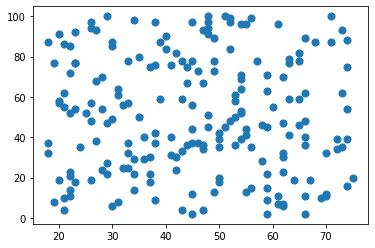

In [ ]:
plt.scatter(X['CustomerAge'], X['SpendingScore'], s=50);

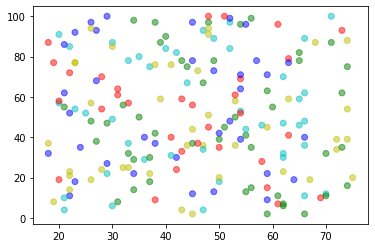

In [ ]:
colmap = {1: 'y',2:'g',3:'b',4:'r',5:'c'}
colors = map(lambda x:colmap[x+1], pred)
print(colors)
colors1 = list(colors)
plt.scatter(X['CustomerAge'],X['SpendingScore'], color = colors1 , alpha = 0.5)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#printing the centroids of each cluster
centroids = k_means.cluster_centers_
centroids

array([[47.06756757, 47.05405405],
       [44.37288136, 16.72881356],
       [44.82089552, 84.65671642]])

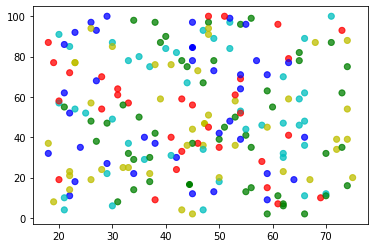

In [ ]:
plt.scatter(X['CustomerAge'],X['SpendingScore'], color = colors1 , alpha = 0.5)
import matplotlib.pyplot as plt 
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])

colmap = {1: 'y',2:'g',3:'b',4:'r',5:'c'}
colors = map(lambda x:colmap[x+1], pred)
print(colors)
colors1 = list(colors)

plt.scatter(X['CustomerAge'],X['SpendingScore'], color = colors1 , alpha = 0.5)

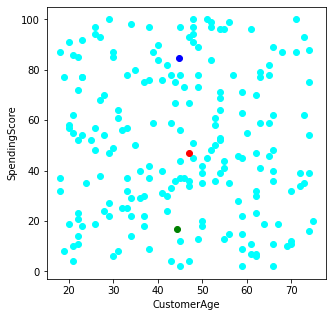

In [ ]:
#Here, we are plotting the random_centroids that we selected previously
plt.figure(figsize=(5, 5))
plt.scatter(X.iloc[:,0], X.iloc[:,1], color='cyan')
length = len(centroids)
colors1=['r','g','b','cyan','yellow','black']
for i in range(length):
  plt.scatter(*centroids[i],color=colors1[i])
plt.xlabel('CustomerAge')
plt.ylabel('SpendingScore')
plt.show()